**Created by Berkay Alan**

**Non-Linear Models - Regression | Ensemble Learning - Bagging - Random Forests**

**31 July 2021**


**Content**



- Ensemble Learning - Bagged Trees(Bagging) (Theory - Model- Tuning)
- Ensemble Learning - Random Forests (Theory - Model- Tuning)


**<span style='color:Blue'> Check out My Github for other Regression Models  </span>**

Github Repository Including:
    
  - K - Nearest Neighbors(KNN) (Theory - Model- Tuning)
  - Support Vector Regression(SVR) (Theory - Model- Tuning)
  - Non-Linear Support Vector Regression(SVR) (Theory - Model- Tuning)
  - Regression(Decision) Trees (CART) (Theory - Model- Tuning)
  - Gradient Boosting Machines(GBM)  (Theory - Model- Tuning)
  - Light Gradient Boosting Machines(LGBM)  (Theory - Model- Tuning)
  - XGBoost(Extreme Gradient Boosting)  (Theory - Model- Tuning)
  - Catboost  (Theory - Model- Tuning)
  
Check it out: https://github.com/berkayalan/Data-Science-Tutorials/blob/master/Non-Linear%20Models%20-%20Regression.ipynb

**For more Tutorial:** https://github.com/berkayalan

## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 



- [**Classification And Regression Trees for Machine Learning**](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/)

- [**Regression Trees by Statquest**](https://www.youtube.com/watch?v=g9c66TUylZ4&ab_channel=StatQuestwithJoshStarmer)

- [**Decision Tree Algorithm, Explained**](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html)

- [**Ensemble methods: bagging, boosting and stacking**](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)

- [**Random Forests by Statquest**](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&ab_channel=StatQuestwithJoshStarmer)

- [**Why random forests outperform decision trees?**](https://towardsdatascience.com/why-random-forests-outperform-decision-trees-1b0f175a0b5)

## Importing Libraries

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import statsmodels.api as sm

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
from sklearn import model_selection

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,BaseEnsemble,GradientBoostingRegressor

In [ ]:
pip install astor

In [ ]:
import astor

In [ ]:
import time

## Ensemble Learning  - Bagged Trees (Bagging)

### Theory

In order to understand Bagged trees, first we need to get familiar with **Ensemble Learning**.

Ensemble learning gives credence to the idea of the “wisdom of crowds,” which suggests that the decision-making of a larger group of people is typically better than that of an individual expert. Similarly, ensemble learning refers to a group (or ensemble) of base learners, or models, which work collectively to achieve a better final prediction. A single model, also known as a base or weak learner, may not perform well individually due to high variance or high bias. However, when weak learners are aggregated, they can form a strong learner, as their combination reduces bias or variance, yielding better model performance.

Ensemble methods are frequently illustrated using decision trees as this algorithm can be prone to overfitting (high variance and low bias) when it hasn’t been pruned and it can also lend itself to underfitting (low variance and high bias) when it’s very small, like a decision stump, which is a decision tree with one level. Remember, when an algorithm overfits or underfits to its training set, it cannot generalize well to new datasets, so ensemble methods are used to counteract this behavior to allow for generalization of the model to new datasets. 

As an example of an Ensemble method, we can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, we obtain the predictions of all the individual trees, then predict the class that gets the most votes.

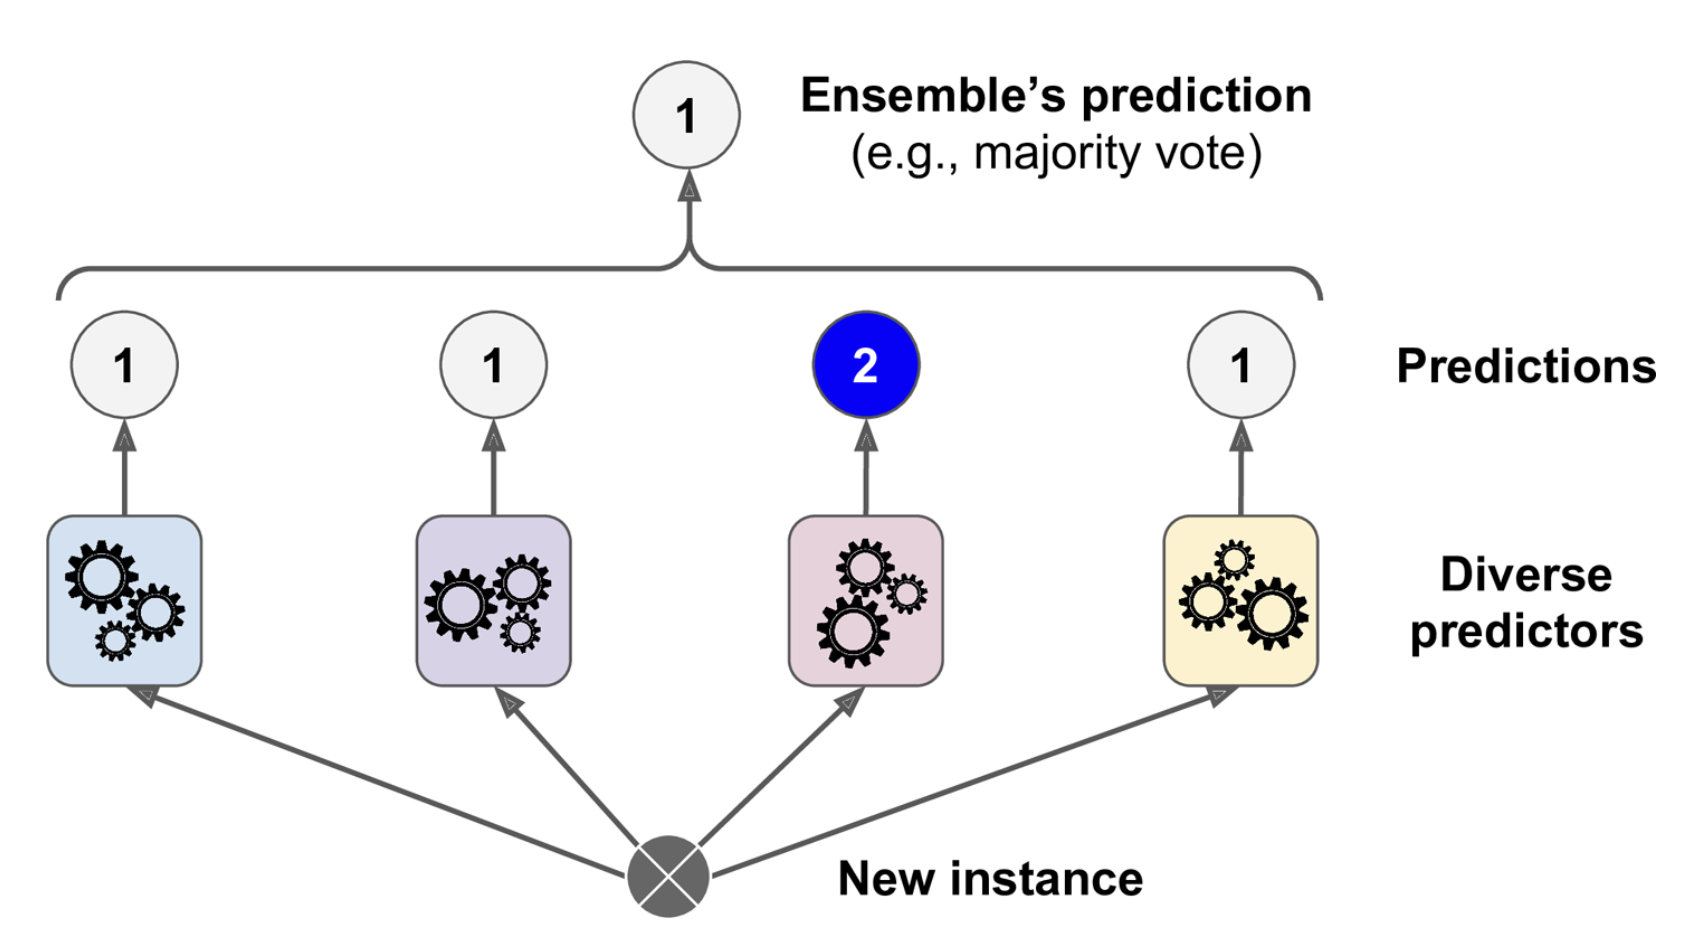

Photo is cited by this book: Hands-On Machine Learning with Scikit-Learn & TensorFlow

Bootstrap aggregating(bagging), is a ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach.

In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once. After several data samples are generated, these weak models are then trained independently, and depending on the type of task—regression or classification, for example—the average or majority of those predictions yield a more accurate estimate. Bagging allows training instances to be sampled several times across multiple predictors.

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the statistical mode (the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression. Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance.

For this section, I highly recommend you to read this well explained article: [**Ensemble methods: bagging, boosting and stacking**](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)

### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
bagging_model = BaggingRegressor(bootstrap_features=True).fit(X_train,y_train)

In [ ]:
#Number of Trees
bagging_model.n_estimators

In [ ]:
#10 different tree
bagging_model.estimators_

In [ ]:
#Samples in each tree
bagging_model.estimators_samples_[:1]

In [ ]:
#Independent Variables in each tree
bagging_model.estimators_features_

### Prediction

In [ ]:
bagging_model

In [ ]:
y_pred=bagging_model.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=bagging_model.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

Let's check each tree independently.

In [ ]:
second_tree = bagging_model.estimators_[1].fit(X_train,y_train).predict(X_test)

In [ ]:
#Test Error for second tree
np.sqrt(mean_squared_error(y_test,second_tree))

In [ ]:
fourth_tree = bagging_model.estimators_[3].fit(X_train,y_train).predict(X_test)

In [ ]:
#Test Error for fourth tree
np.sqrt(mean_squared_error(y_test,fourth_tree))

### Model Tuning

In [ ]:
bagging_model

In [ ]:
bagging_params = {"n_estimators":range(1,30)}

In [ ]:
bagging_cv_model = GridSearchCV(bagging_model,bagging_params,cv=15).fit(X_train,y_train)

In [ ]:
bagging_cv_model.best_params_

In [ ]:
tuned_bagging_model = BaggingRegressor(n_estimators=bagging_cv_model.best_params_["n_estimators"]).fit(X_train,y_train)

In [ ]:
tuned_bagging_model

In [ ]:
y_pred=tuned_bagging_model.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=tuned_bagging_model.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

## Ensemble Learning - Random Forests

### Theory

Random Forest is also an example of ensemble learning, in which we combine multiple machine learning algorithms to obtain better predictive performance.

The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging or “the random subspace method”, generates a random subset of features, which ensures low correlation among decision trees. This is a key difference between decision trees and random forests. While decision trees consider all the possible feature splits, random forests only select a subset of those features.

Let's try to understand with an example. For example, I want to watch a movie today and I am not sure what to watch. After calling one of my best friends, she recommend a movie to me according to my old preferences that she know. At this point, my old preferences are training set for her. It's a classical decision tree. But if I would get recommendations from my 20 different friends and select most voted movie, that would be **Random Forests**.

Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems.

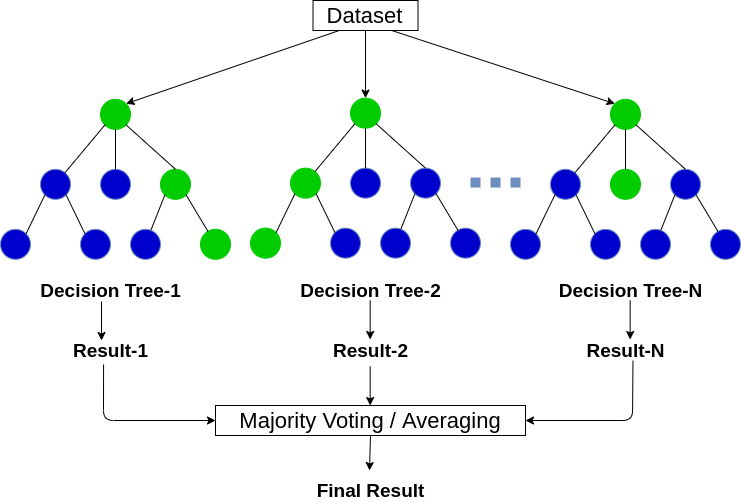

Photo is cited by: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2020%2F05%2Fdecision-tree-vs-random-forest-algorithm%2F&psig=AOvVaw2jevf2JFgvEKCBieh5yaHX&ust=1627289101408000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCICY4bvq_fECFQAAAAAdAAAAABAD

Yet another great quality of Random Forests is that they make it easy to measure the relative importance of each feature. Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each node’s weight is equal to the number of training samples that are associated with it. 

Another advantage of sampling over the features is that it makes the decision making process more robust to missing data: observations (from the training dataset or not) with missing data can still be regressed or classified based on the trees that take into account only features where data are not missing. Thus, random forest algorithm combines the concepts of bagging and random feature subspace selection to create more robust models.

### Model

For a real world example, we will work with **Hitters** dataset.

It can be downloaded here: https://www.kaggle.com/floser/hitters

In [ ]:
hts = pd.read_csv("../input/hitters/Hitters.csv")
hts.head()

Now we will remove NA values.

In [ ]:
hts.dropna(inplace=True)

We will do **One Hot Encoding** to categorical columns.

In [ ]:
one_hot_encoded = pd.get_dummies(hts[["League","Division","NewLeague"]])
one_hot_encoded.head()

In [ ]:
new_hts = hts.drop(["League","Division","NewLeague","Salary"],axis=1).astype("float64")

In [ ]:
X = pd.concat([new_hts,one_hot_encoded[["League_N","Division_W","NewLeague_N"]]],axis=1)
X.head()

In [ ]:
y = hts.Salary # Target-dependent variable

Now we will split our dataset as train and test set.

In [ ]:
hts.shape

In [ ]:
#Independent Variables
X.shape

In [ ]:
#Dependent Variables
y.shape

In [ ]:
X_train = X.iloc[:210]
X_test = X.iloc[210:]
y_train = y[:210]
y_test = y[210:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
random_forests = RandomForestRegressor(random_state=60).fit(X_train,y_train)

In [ ]:
random_forests

In [ ]:
random_forests.max_features

In [ ]:
#Number of Trees
random_forests.n_estimators

In [ ]:
random_forests.min_samples_leaf

In [ ]:
random_forests.min_samples_split

Let's look at the importances of features.

In [ ]:
random_forests.feature_importances_

In [ ]:
std= np.std([ tree.feature_importances_ for tree in random_forests.estimators_], axis=0)

In [ ]:
fig, ax = plt.subplots()
pd.Series(random_forests.feature_importances_,index=[X_train.columns]).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Feature Imporances")
fig.tight_layout()

### Prediction

In [ ]:
random_forests

In [ ]:
y_pred=random_forests.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=random_forests.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

### Model Tuning

In [ ]:
random_forests

In [ ]:
random_forests_params = {"max_depth": list(range(1,20)),
                         "max_features":[2,5,8,11,16],
                         "n_estimators":[300,500,1000,1700]}

In [ ]:
random_forests = RandomForestRegressor(random_state=60)

In [ ]:
cv_random_forests = GridSearchCV(random_forests,random_forests_params,cv=7,n_jobs=-1)

In [ ]:
#It takes nearly 10 minutes
start_time = time.time()
cv_random_forests.fit(X_train,y_train)
elapsed_time = time.time() - start_time

print(f"Elapsed time for cross validation: "
      f"{elapsed_time:.3f} seconds")

In [ ]:
cv_random_forests.best_params_

In [ ]:
random_forests_tuned= RandomForestRegressor(max_depth=cv_random_forests.best_params_["max_depth"],
                                            max_features=cv_random_forests.best_params_["max_features"],
                                            n_estimators=cv_random_forests.best_params_["n_estimators"]).fit(X_train,y_train)

In [ ]:
random_forests_tuned

In [ ]:
y_pred=random_forests_tuned.predict(X_train)

In [ ]:
#Train Error
np.sqrt(mean_squared_error(y_train,y_pred))

In [ ]:
r2_score(y_train,y_pred)

In [ ]:
y_pred=random_forests_tuned.predict(X_test)

In [ ]:
#Test Error
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
r2_score(y_test,y_pred)

Let's look at the importances of features.

In [ ]:
Importances = pd.DataFrame({"Importance":random_forests_tuned.feature_importances_*100},index=X_train.columns)

In [ ]:
Importances

In [ ]:
Importances.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="b")
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.title("Feature Importances");